In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
import numpy as np

**Load Dataset**

In [79]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Univariate Analysis**

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

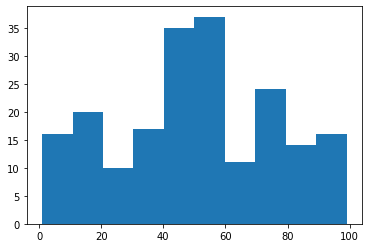

In [13]:
x=df['Spending Score (1-100)']
plt.hist(x)

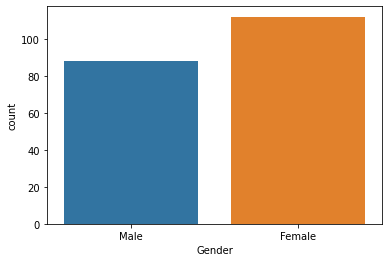

In [15]:
sns.countplot(x ='Gender', data = df)

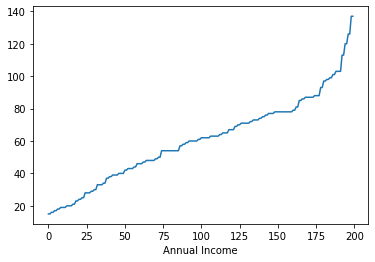

In [19]:
ypoints = np.array(df['Annual Income (k$)'])
plt.plot(ypoints)
plt.xlabel("Annual Income")
plt.show()

**Bivariate Analysis**

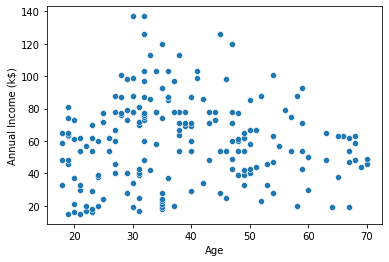

In [22]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)

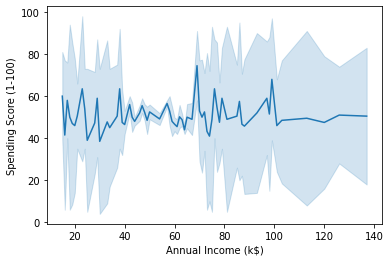

In [23]:
sns.lineplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.show()

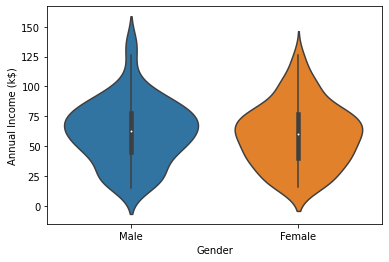

In [24]:
sns.violinplot(x ='Gender', y ='Annual Income (k$)', data = df)

**Multi-variate Analysis**

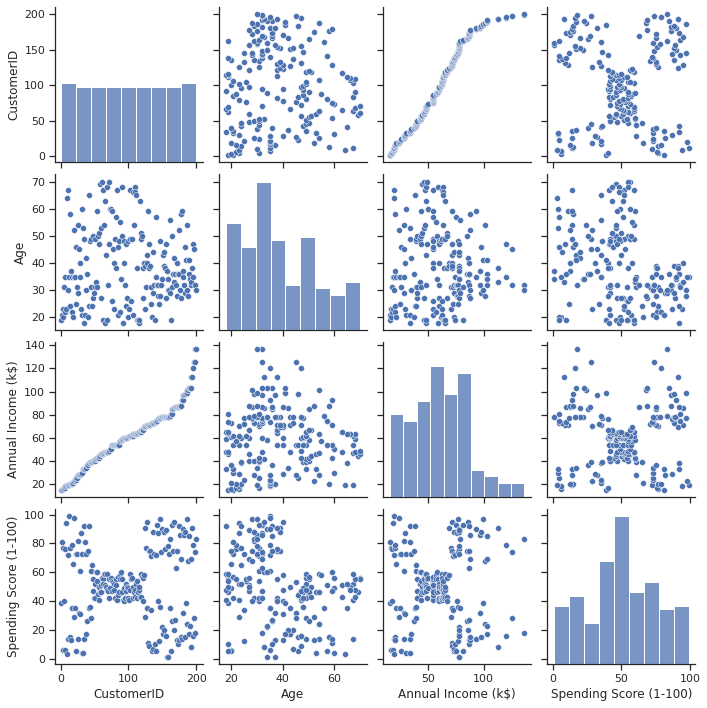

In [25]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
plt.show()

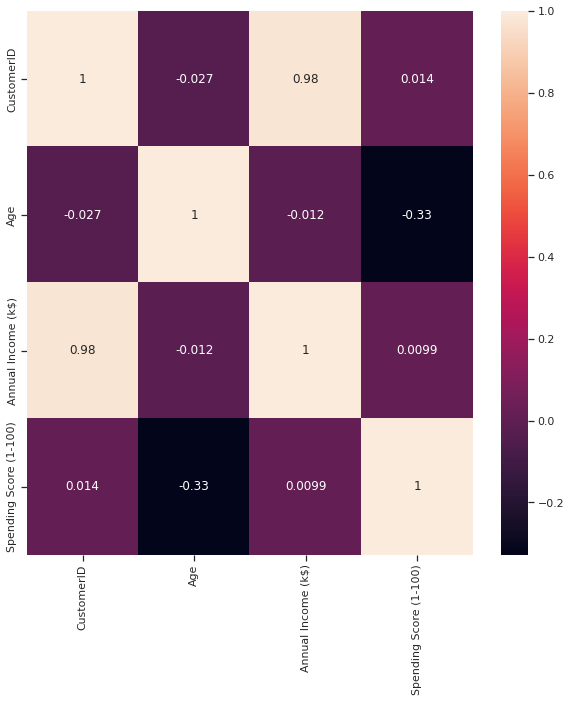

In [29]:
plt.figure(figsize =(10, 10))
sns.heatmap(df.corr(), annot=True)


**descriptive statistics**

In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [32]:
print("The Median of the Age:",df['Age'].median())

The Median of the Age: 36.0


In [33]:
print("Skewness: ",df['Annual Income (k$)'].skew())

Skewness:  0.3218425498619055


In [35]:
print("Kurtosis: ",df['Spending Score (1-100)'].kurtosis())

Kurtosis:  -0.8266291062061502


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [38]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

**Checking Missing Value**

In [39]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Handling Outliers**

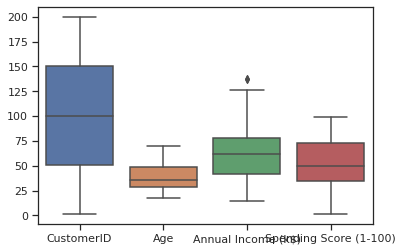

In [40]:
sns.boxplot(data=df)

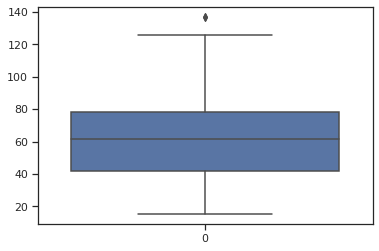

In [41]:
sns.boxplot(data=df['Annual Income (k$)'])

In [42]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_whisker,upper_whisker,np.where(df['Annual Income (k$)']<lower_whisker,lower_whisker,df['Annual Income (k$)']))

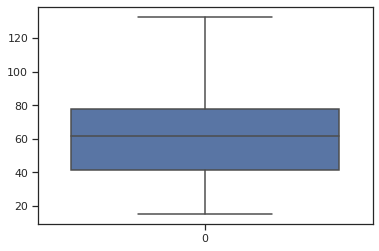

In [43]:
sns.boxplot(data=df['Annual Income (k$)'])

**Check for categorical Data and perform encoding**

In [45]:
cat=[var for var in df.columns if df[var].dtype=="object"]
print("There are {} categorical variables.".format(len(cat))) #no categorical variables
print("The categorical variables are:\n\n",cat)

There are 1 categorical variables.
The categorical variables are:

 ['Gender']


In [89]:
from sklearn.preprocessing import LabelEncoder
 
#By analysing categorical value Geography and Gender has a few values so we can use label encoding
le = LabelEncoder()
 

label = le.fit_transform(df['Gender'])
df["Gender"] = label

In [48]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.00,39
1,2,1,21,15.00,81
2,3,0,20,16.00,6
3,4,0,23,16.00,77
4,5,0,31,17.00,40
...,...,...,...,...,...
195,196,0,35,120.00,79
196,197,0,45,126.00,28
197,198,1,32,126.00,74
198,199,1,32,132.75,18


**Scale the data**

In [49]:
from sklearn import preprocessing

x=df
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
print(standard_df[0])

[-1.7234121   1.12815215 -1.42456879 -1.74542941 -0.43480148]


**Perform Clustering Algorithm**

In [7]:
x=df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

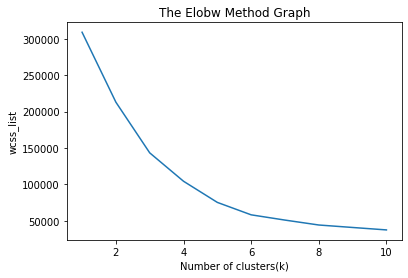

In [9]:
from sklearn.cluster import KMeans
wscc=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(x)
  wscc.append(kmeans.inertia_)
plt.plot(range(1, 11), wscc)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [ ]:
print(wscc)

[308862.06000000006, 212889.44245524303, 143391.59236035676, 104414.67534220168, 75399.61541401484, 58348.641363315044, 51132.703212576904, 44392.11566567935, 41000.8742213207, 37649.69225429742]


In [60]:
x = df.iloc[:, [3, 4]].values
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

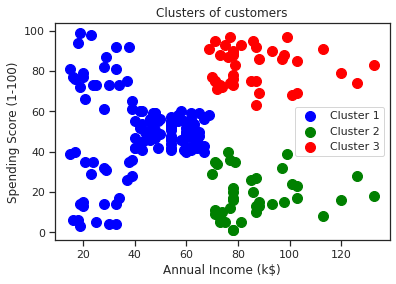

In [61]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  

plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

**Add the cluster data with the primary dataset**

In [62]:
df['Cluster']=y_predict
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15.00,39,0
1,2,1,21,15.00,81,0
2,3,0,20,16.00,6,0
3,4,0,23,16.00,77,0
4,5,0,31,17.00,40,0
...,...,...,...,...,...,...
195,196,0,35,120.00,79,2
196,197,0,45,126.00,28,1
197,198,1,32,126.00,74,2
198,199,1,32,132.75,18,1


**Split the data into dependent and independent variables.**

In [64]:
from sklearn.model_selection import train_test_split
x=df.iloc[:, :-1]
y=df['Spending Score (1-100)']


**Split the data into training and testing**

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print("Total rows in dataset:",df.shape)
print("Train Data shape: ",x_train.shape)
print("Test Data shape: ",x_test.shape)

Total rows in dataset: (200, 6)
Train Data shape:  (160, 5)
Test Data shape:  (40, 5)


**Build the Model**

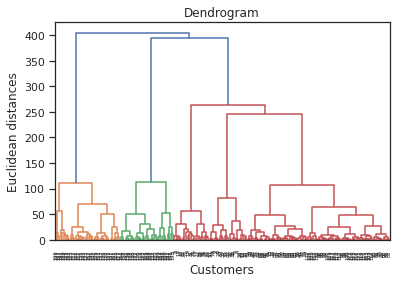

In [70]:
import scipy.cluster.hierarchy as sch
x=x=df[['Annual Income (k$)',	'Spending Score (1-100)']]
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [83]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

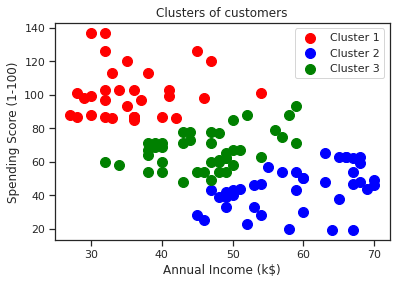

In [85]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()